# Лабораторная работа 1

In [1]:
# Импорт библиотек
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

# 1. Генерация данных и сохранение в файл data.csv
with open('data1.csv', 'w') as file:
    # Записываем заголовок
    file.write("x,y,z\n")

    # Генерируем 100 строк данных
    for _ in range(100):
        x = np.random.uniform(0.1, 10)  # x ∈ [0.1, 10] (избегаем x=0)
        y = np.random.uniform(0, 10)    # y ∈ [0, 10]
        z = x + np.log(y**2)                 # z = x + log(y^2)

        # Записываем строку в файл
        file.write(f"{x},{y},{z}\n")

print("Файл data1.csv успешно создан.")

# 2. Загрузка данных
data_loaded = pd.read_csv('data1.csv')
X = data_loaded[['x', 'y']]  # Независимые переменные
y_target = data_loaded['z']  # Зависимая переменная

# 3. Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y_target, test_size=0.2, random_state=42)

# 4. Добавление полиномиальных признаков (второй степени)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# 5. Обучение модели линейной регрессии
model = LinearRegression()
model.fit(X_train_poly, y_train)

# 6. Предсказание на обучающей выборке
predicted_z = model.predict(X_train_poly)

# 7. Оценка качества модели
train_score = model.score(X_train_poly, y_train)
test_score = model.score(X_test_poly, y_test)

# Вывод результатов
print("\n--- Результаты ---")
print("Коэффициенты модели:", model.coef_)
print("Свободный член (intercept):", model.intercept_)
print("R² на обучающей выборке:", train_score)
print("R² на тестовой выборке:", test_score)
print("\nПервые 10 предсказанных значений Z:")
print(predicted_z[:10])

Файл data1.csv успешно создан.

--- Результаты ---
Коэффициенты модели: [ 1.14152319  1.70498541 -0.00537804 -0.01512249 -0.10611924]
Свободный член (intercept): -2.4878178436135903
R² на обучающей выборке: 0.9736152258583082
R² на тестовой выборке: 0.9808444878854277

Первые 10 предсказанных значений Z:
[11.96965965 10.30310652  3.54498669  3.73955524  8.22970676  2.52360392
  5.29847313 13.44915573  0.74279888 12.57047802]


# Лабораторная работа 2

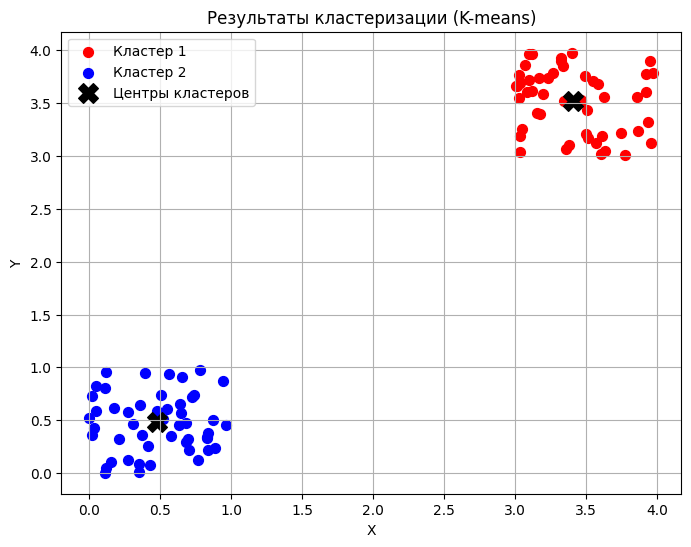

Результаты при разном количестве кластеров:

Количество кластеров: 2
Первые 10 меток кластеров: [1 1 1 1 1 1 1 1 1 1]

Количество кластеров: 3
Первые 10 меток кластеров: [1 1 1 1 1 1 1 1 1 1]

Количество кластеров: 4
Первые 10 меток кластеров: [1 3 3 1 1 1 3 3 1 3]


In [2]:
# Импорт необходимых библиотек
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Шаг 1: Генерация точек внутри двух квадратов
# Квадрат 1 с центром в [0, 0]
square1 = np.random.rand(50, 2)

# Квадрат 2 с центром в [3, 3]
square2 = np.random.rand(50, 2) + [3, 3]

# Объединение точек
X = np.vstack((square1, square2))

# Шаг 2: Применение метода K-means для кластеризации
kmeans = KMeans(n_clusters=2, random_state=0, n_init=10) # Указываем n_init явно
labels = kmeans.fit_predict(X)

# Шаг 3: Визуализация результатов кластеризации
plt.figure(figsize=(8, 6))

# Отображаем точки разных кластеров разными цветами
plt.scatter(X[labels == 0, 0], X[labels == 0, 1], s=50, c='red', label='Кластер 1')
plt.scatter(X[labels == 1, 0], X[labels == 1, 1], s=50, c='blue', label='Кластер 2')

# Отображаем центры кластеров
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], s=200, c='black', marker='X', label='Центры кластеров')

# Настраиваем график
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Результаты кластеризации (K-means)')
plt.legend()
plt.grid(True)
plt.show()

# Шаг 4: Проверка на разное количество кластеров
print("Результаты при разном количестве кластеров:")

for k in [2, 3, 4]:
    kmeans_test = KMeans(n_clusters=k, random_state=0, n_init=10) # Указываем n_init явно
    labels_test = kmeans_test.fit_predict(X)
    print(f"\nКоличество кластеров: {k}")
    print("Первые 10 меток кластеров:", labels_test[:10])

# Лабораторная работа 3

Результаты точности модели при разных значениях параметра регуляризации (C):

C = 0.001 | Точность на обучающей выборке: 52.25%
        | Точность на тестовой выборке:   47.50%

C = 0.010 | Точность на обучающей выборке: 52.25%
        | Точность на тестовой выборке:   48.00%

C = 0.100 | Точность на обучающей выборке: 52.12%
        | Точность на тестовой выборке:   47.50%

C = 1.000 | Точность на обучающей выборке: 52.00%
        | Точность на тестовой выборке:   47.50%

C = 10.000 | Точность на обучающей выборке: 52.00%
        | Точность на тестовой выборке:   47.50%

C = 100.000 | Точность на обучающей выборке: 52.00%
        | Точность на тестовой выборке:   47.50%



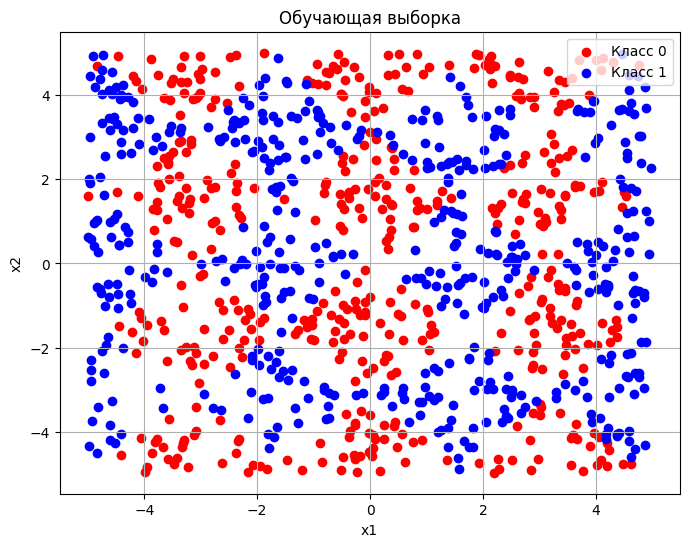

In [3]:
# Импорт библиотек
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Функция для генерации обучающей выборки
def generate_data(num_samples=1000):
    # Генерируем случайные точки в диапазоне [-5, 5]
    X = np.random.uniform(-5, 5, (num_samples, 2))
    # Вычисляем метки по формуле: sin^2(x1) + cos^2(x2) - 1 >= 0
    y = (np.sin(X[:, 0])**2 + np.cos(X[:, 1])**2 - 1) >= 0
    return X, y.astype(int)

# Основная функция программы
def main():
    # Шаг 1: Генерация данных
    X, y = generate_data()

    # Шаг 2: Разделение на обучающую и тестовую выборки
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Шаг 3: Обучение модели с разными параметрами регуляризации
    C_values = [0.001, 0.01, 0.1, 1, 10, 100]

    print("Результаты точности модели при разных значениях параметра регуляризации (C):\n")
    for C in C_values:
        model = LogisticRegression(C=C, solver='liblinear', max_iter=1000)
        model.fit(X_train, y_train)

        train_accuracy = model.score(X_train, y_train)
        test_accuracy = model.score(X_test, y_test)

        print(f"C = {C:.3f} | Точность на обучающей выборке: {train_accuracy:.2%}")
        print(f"        | Точность на тестовой выборке:   {test_accuracy:.2%}\n")

    # Шаг 4: Визуализация обучающей выборки
    plt.figure(figsize=(8, 6))
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Класс 0')
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Класс 1')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title('Обучающая выборка')
    plt.legend()
    plt.grid(True)
    plt.show()

# Запуск программы
if __name__ == '__main__':
    main()